In [1]:
%pip install pandas
%pip install scikit-learn
%pip install tensorflow
%pip install keras

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\MSii\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\MSii\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\MSii\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\MSii\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# from keras.wrappers.scikitlearn import KerasRegressor
from scipy.stats import uniform, randint
from sklearn.pipeline import Pipeline
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
import joblib

In [4]:
data = pd.read_csv('preprocessing/updated_data_V2_encoded.csv')
data.drop(['Unnamed: 0'], axis = 1, inplace = True)
data.drop(['Unnamed: 7'], axis = 1, inplace = True)
df = pd.DataFrame(data)
# df['stayTime'] = df['stayTime'].astype(np.float32)
# Separate features (X) and target variables (y)
X = df.drop([ 'stayTime','locations', 'placeID', 'openHours', 'parking', 'diner'], axis=1).values.astype(np.float32)
y = df[['stayTime']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a neural network model
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.shape[1], activation='linear'))

optimizer = Adam(learning_rate=0.001)

# Compile the model
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100


C:\Users\MSii\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0000e+00 - loss: 3084.7000 - val_accuracy: 0.0000e+00 - val_loss: 92.8032
Epoch 2/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 95.9285 - val_accuracy: 0.0000e+00 - val_loss: 94.6669
Epoch 3/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 93.2511 - val_accuracy: 0.0000e+00 - val_loss: 90.9880
Epoch 4/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 95.3543 - val_accuracy: 0.0000e+00 - val_loss: 90.3427
Epoch 5/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 96.6700 - val_accuracy: 0.0000e+00 - val_loss: 91.9529
Epoch 6/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 100.9377 - val_accuracy: 0.0000e+00 - val_loss: 89.8706
Epoch 7/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 96.4456 - val_accuracy: 0.0000e+00 - val_loss: 89.5722
Epoch 8/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [6]:
# Predict on the test set
y_preds = model.predict(X_test)
# Convert probabilities to binary predictions (0 or 1)
y_preds = np.round(y_preds)
print(y_preds)
# y_preds = (y_pred > 0.5).astype(int)
print(y_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[[ 58.]
 [ 59.]
 [ 89.]
 [155.]
 [124.]
 [107.]
 [ 83.]
 [133.]
 [111.]
 [ 49.]
 [120.]
 [ 72.]
 [ 44.]
 [ 47.]
 [151.]
 [ 74.]
 [ 50.]
 [ 87.]
 [139.]
 [161.]
 [ 98.]
 [122.]
 [199.]
 [ 56.]
 [ 56.]
 [ 44.]
 [ 99.]
 [175.]
 [ 40.]
 [ 59.]
 [ 72.]
 [ 42.]
 [155.]
 [171.]
 [ 69.]
 [ 87.]
 [ 70.]
 [157.]
 [155.]
 [154.]
 [ 66.]
 [ 61.]
 [171.]
 [126.]
 [113.]
 [153.]
 [ 38.]
 [ 87.]
 [ 76.]
 [130.]
 [114.]
 [ 96.]
 [ 55.]
 [178.]
 [128.]
 [ 80.]
 [122.]
 [127.]
 [ 50.]
 [ 78.]
 [100.]
 [118.]
 [165.]
 [120.]
 [ 81.]
 [ 99.]
 [ 82.]
 [ 61.]
 [ 62.]
 [ 72.]
 [ 64.]
 [196.]
 [126.]
 [ 53.]
 [122.]
 [ 92.]
 [ 83.]
 [ 53.]
 [126.]
 [120.]
 [ 84.]
 [ 62.]
 [205.]
 [102.]
 [156.]
 [ 71.]
 [ 48.]
 [190.]
 [108.]
 [ 97.]
 [ 52.]
 [ 96.]
 [127.]
 [129.]
 [ 81.]
 [ 54.]
 [ 44.]
 [ 58.]
 [102.]
 [ 60.]
 [ 99.]
 [ 55.]
 [ 92.]
 [113.]
 [130.]
 [ 65.]
 [ 50.]
 [117.]
 [ 58.]
 [ 57.]
 [178.]
 [124.]
 [ 98.]
 [ 55.]
 [114.]
 [130.]
 [ 83.]
 [ 65.]
 [112.]
 [ 63.]
 

In [7]:
# Evaluate the model
mse_values = {column: mean_squared_error(y_test[column], y_preds[:, i]) for i, column in enumerate(y.columns)}
print(f'Mean Squared Errors: {mse_values}')

mse = mean_squared_error(y_test, y_preds)
mae = mean_absolute_error(y_test, y_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_preds)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R2 score: {r2}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Errors: {'stayTime': 83.75928473177441}
Mean Squared Error: 83.75928473177441
Mean Absolute Error: 7.341127922971114
R2 score: 0.9531129291045745
Root Mean Squared Error: 9.152009873889693


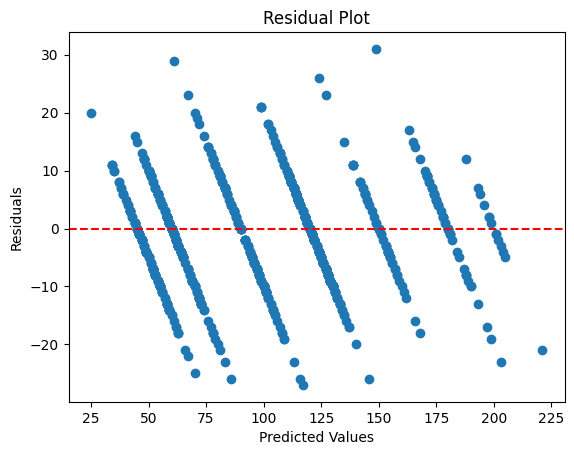

In [8]:
residuals = y_test - y_preds
plt.scatter(y_preds, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

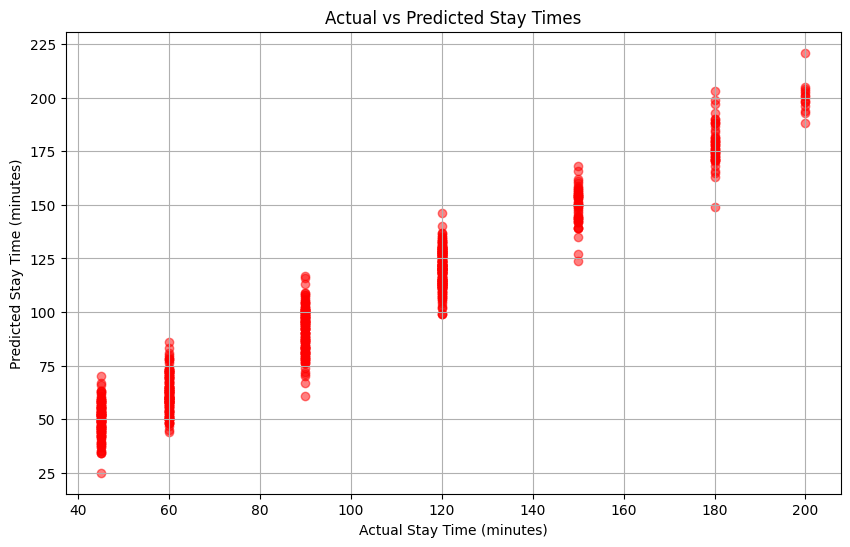

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_preds, color='red', alpha=0.5)
plt.title('Actual vs Predicted Stay Times')
plt.xlabel('Actual Stay Time (minutes)')
plt.ylabel('Predicted Stay Time (minutes)')
plt.grid(True)
plt.show()